In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    ## break this in to two parts regulization and loss term 
    regularization_term=l2_param*np.linalg.norm(theta) ## l_2 regulairzation term          
    loss_term_one = np.logaddexp(0, -y* (X@theta))
    loss_term_zero = np.logaddexp(0, (1-y)* (X@theta))
    return regularization_term+np.mean(loss_term_zero+loss_term_one)

def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    
    x0=np.ones(X.shape[1])
    res=sp.optimize.minimize(objective_function, x0, args=( X, y, l2_param ))
    return res.x     

## load and pre-process data 

In [6]:
X_train= np.loadtxt(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/X_train.txt', delimiter=',')
y_train=np.loadtxt(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/y_train.txt', delimiter=',')
X_test=np.loadtxt(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/X_val.txt', delimiter=',')
y_test=np.loadtxt(r'/home/buzgalbraith/work/school/spring_2023/Machine_Learning_spring_2023/homework_code/hw4/logistic-code/y_val.txt', delimiter=',')

def standardize(X_train,X_test):
    """
    Standardizes the training and test data to have zero mean and unit variance along the columns (features).

    Args:
        X_train: 2D numpy array of size (num_instances, num_features)
            Training data to be standardized.
        X_test: 2D numpy array of size (num_instances, num_features)
            Test data to be standardized.

    Returns:
        X_train_std: 2D numpy array of size (num_instances, num_features)
            Standardized training data.
        X_test_std: 2D numpy array of size (num_instances, num_features)
            Standardized test data.
    """
    X_train= (X_train - np.mean(X_train) ) / np.std(X_train)
    X_test=( X_test - np.mean(X_test) ) / np.std(X_test)
    return X_train, X_test 
def add_bias_term(X_train, X_test):
    """
    Adds a bias term (i.e., a column of ones) to the beginning of the training and test data.

    Args:
        X_train: 2D numpy array of size (num_instances, num_features)
            Training data to which a bias term will be added.
        X_test: 2D numpy array of size (num_instances, num_features)
            Test data to which a bias term will be added.

    Returns:
        X_train_bias: 2D numpy array of size (num_instances, num_features+1)
            Training data with an additional column of ones added.
        X_test_bias: 2D numpy array of size (num_instances, num_features+1)
            Test data with an additional column of ones added.
    """
    X_train=np.concatenate([np.ones((X_train.shape[0], 1)), X_train] , axis=1)
    X_test=np.concatenate([np.ones((X_test.shape[0], 1)), X_test] , axis=1)
    return X_train, X_test

X_train, X_test=standardize(X_train,X_test)
X_train, X_test=add_bias_term(X_train, X_test)

In [16]:
w=fit_logistic_reg( X=X_train, y=y_train,objective_function=f_objective )
w
theta_t=np.ones(X_train.shape[1])
f_objective(theta_t, X_train, y_train, l2_param=1)


6.905213162176192

## question 8

In [43]:

def log_likelyhood(w,X,y):
    """ 
    Calculates the log-likelihood for logistic regression.

    Parameters:
    w (array-like): The weights for the logistic regression model.
    X (array-like): The input data.
    y (array-like): The output labels.

    Returns:
    float: The log-likelihood of the logistic regression model. 
    """
    eta = X@w
    return -np.sum(y * np.logaddexp(0 , -eta) + (1 - y) * np.logaddexp(0, eta) )
def test_l2(min_val, max_val):
    """
    Trains logistic regression models with varying L2 regularization parameters and plots the log-likelihoods of the validation set.

    Parameters:
    min_val (float): The minimum value of the L2 regularization parameter.
    max_val (float): The maximum value of the L2 regularization parameter.

    Returns:
    None.
    """
    losses=[]
    for lambda_param in np.linspace(min_val , max_val , 100):
        w = fit_logistic_reg(X = X_train, y = y_train , objective_function = f_objective , l2_param = lambda_param)
        losses.append([lambda_param,log_likelyhood(w , X_test , y_test)])
    losses=np.array(losses)
    print("optimal lambda found is", losses[np.argmax(losses[:,1]),0])
    plt.plot(np.linspace(min_val , max_val , 50) , losses[:,1])
    plt.ylabel("log likelihood of validation set ")
    plt.xlabel("$\lambda$")


optimal lambda found is 0.0001


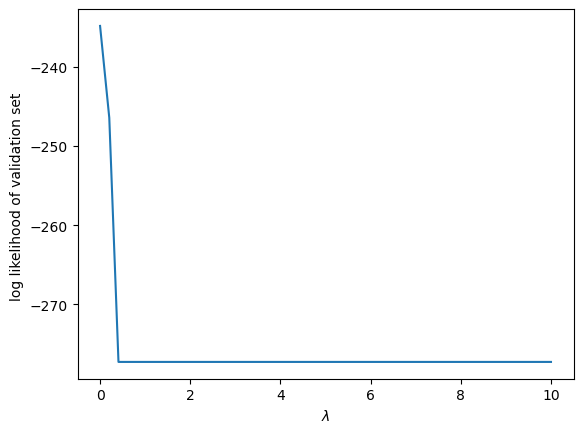

In [164]:
test_l2(.0001,10)


optimal lambda found is 0.040817285714285716


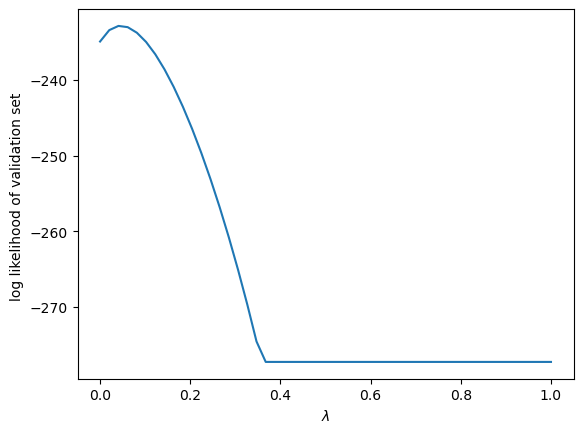

In [46]:
test_l2(1e-6,1)

optimal lambda found is 0.044898036734693884


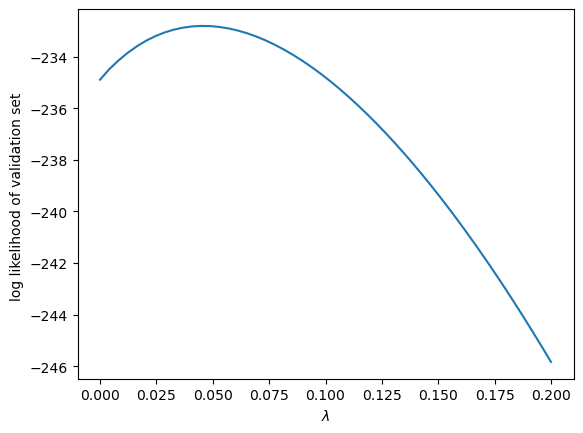

In [47]:
l=test_l2(0.0000001,.2)

In [29]:
np.max(l[:,1])

245.82968260997268

# question  8

0.6666666666666666

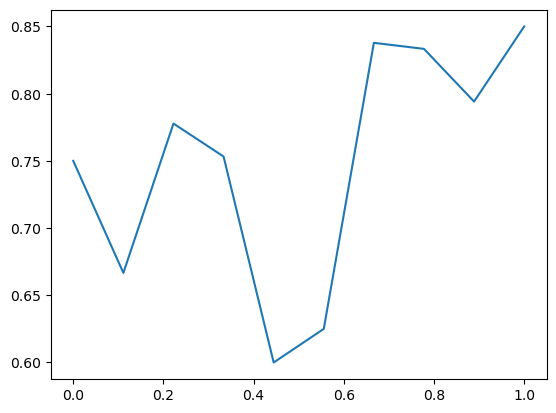

In [146]:
def logistic(eta):
    return 1/ (1 + np.exp(-eta) )
def binned_probs_and_labels(X_train, y_train, X_test, y_test):
    w_hat=fit_logistic_reg( X=X_train, y=y_train,objective_function=f_objective, l2_param=0.044898036734693884)
    predicted_pobs=logistic(X_test@w_hat)
    bins=np.linspace(0,1,11)
    inds = np.digitize(predicted_pobs, bins)
    binned_probs=np.array([predicted_pobs[np.argwhere(inds==i)] for i in range(1,11)] )
    binned_preds=np.array([[1 if (binned_probs[i][j]>=.5) else 0 for j in range(binned_probs[i].size)] for i in range(binned_probs.size)])
    binned_labels=np.array([y_test[np.argwhere(inds==i)] for i in range(1,11)] )
    return [[(bins[i], bins[i+1]),np.sum((binned_preds[i]==binned_labes[i]).all(axis=1))/len(binned_preds[i])] for i in range(10)]
    return binned_preds,binned_labels
# np.array([np.array([predicted_pobs[np.argwhere(inds==i)], y_test[np.argwhere(inds==i)]]) for i in range(1,11)] )
def get_callibration(binned_probs_and_labels):
    pass    
#consistency=binned_probs_and_labels(X_train, y_train, X_test, y_test)
consistency=np.array(consistency)
# x=range(0,10)
plt.plot(np.linspace(0,1,10),consistency[x,1])
# consistency[:,1]
consistency[1,1]

/tmp/ipykernel_2855/96704603.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_probs=np.array([predicted_pobs[np.argwhere(inds==i)] for i in range(1,11)] )
/tmp/ipykernel_2855/96704603.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binned_labels=np.array([y_test[np.argwhere(inds==i)] for i in range(1,11)] )


,bins,mean predicted probability (positive class 1 ),fraction of true positives (positive class 1)
0,"(0.0, 0.1)",0.075642,0.250000
1,"(0.1, 0.2)",0.170442,0.333333
2,"(0.2, 0.3)",0.252565,0.222222
3,"(0.3, 0.4)",0.350232,0.246753
4,"(0.4, 0.5)",0.451518,0.400000
5,"(0.5, 0.6)",0.546757,0.625000
6,"(0.6, 0.7)",0.648707,0.837838
7,"(0.7, 0.8)",0.747573,0.833333
8,"(0.8, 0.9)",0.846517,0.794118
9,"(0.9, 1.0)",0.926252,0.850000


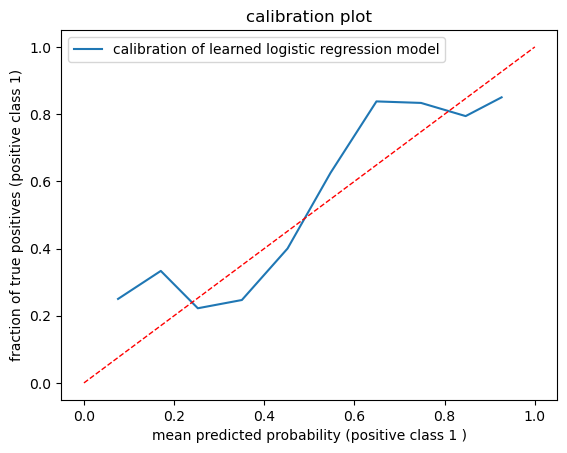

In [166]:
def logistic(eta):
    return 1/ (1 + np.exp(-eta) )
w_hat=fit_logistic_reg( X=X_train, y=y_train,objective_function=f_objective, l2_param=0.044898036734693884)
predicted_pobs=logistic(X_test@w_hat)
bins=np.linspace(0,1,11)
inds = np.digitize(predicted_pobs, bins)
binned_probs=np.array([predicted_pobs[np.argwhere(inds==i)] for i in range(1,11)] )
binned_labels=np.array([y_test[np.argwhere(inds==i)] for i in range(1,11)] )
probability_postive=[np.sum(binn)/len(binn) for binn in binned_labels]
mean_predicted_prob=[np.mean(binn) for binn in binned_probs]
bins_out= [(np.round(bins[i],decimals=2), np.round(bins[i+1],decimals=2)) for i in range(10)]
plt.plot(mean_predicted_prob,probability_postive, label="calibration of learned logistic regression model")
plt.xlabel("mean predicted probability (positive class 1 )")
plt.ylabel("fraction of true positives (positive class 1)")
plt.title("calibration plot")
plt.legend()
plt.plot([0,1], [0,1], ls='--', lw=1, color='r', label='perfect calibration')
pd.DataFrame(data={"bins": bins_out,"mean predicted probability (positive class 1 )": mean_predicted_prob,"fraction of true positives (positive class 1)": probability_postive })
